# Exploratory Data Analysis

In [ ]:

import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt



## Importing Data

In [ ]:
data = pd.read_csv('dataset/Kaggle_Training_Dataset_v2.csv') 

In [ ]:
print('Number of data points :', data.shape[0])
print('Number of varaiables :', data.shape[1])
print('Variabales', data.columns.values)

Number of data points : 1687861
Number of varaiables : 23
Variabales ['sku' 'national_inv' 'lead_time' 'in_transit_qty' 'forecast_3_month'
 'forecast_6_month' 'forecast_9_month' 'sales_1_month' 'sales_3_month'
 'sales_6_month' 'sales_9_month' 'min_bank' 'potential_issue'
 'pieces_past_due' 'perf_6_month_avg' 'perf_12_month_avg' 'local_bo_qty'
 'deck_risk' 'oe_constraint' 'ppap_risk' 'stop_auto_buy' 'rev_stop'
 'went_on_backorder']


In [ ]:
data.shape

(1687861, 23)

In [ ]:
data.head(3)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [ ]:
data.tail(3)


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,...,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dataset info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

1. We have a total 23 columns in which 22 are independent and one is the target variable “went_on_backorder”. sku is a unique number so we can drop the column.
2. After removing the unique sku column, we have 15 are numerical and 6 are categorical and 1 is target variable (binary YES or NO).
3. We have 1687861 data points in training dataset
4. In Lead time coloumn we have some missing values.

 ## Dataset description


In [ ]:
data.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [ ]:
data.forecast_9_month.mean()

506.3644306992286

### Checking sku column using describe 

In [ ]:
data.sku.describe()

count     1687861
unique    1687861
top       3280682
freq            1
Name: sku, dtype: object

 - sku coloumn to be droped as it is a unique product id

### Checking perf_6_month_avg for abnormalities

In [ ]:
data.perf_6_month_avg.value_counts().sort_index(ascending=True)

-99.00    129478
 0.00      39013
 0.01        572
 0.02       1053
 0.03        703
           ...  
 0.96      39850
 0.97      62531
 0.98      83611
 0.99     143757
 1.00     132329
Name: perf_6_month_avg, Length: 102, dtype: int64

1. For perf_6_month_avg and perf_12_month_avg has a MAX value as 1 and min value is as -99. Up on checking the columns we can say that the -99 is like nan value. On observing that it caontains 129478 values as -99. we can caonsider them as nan values.
2. Columns ( 'in_transit_qty' 'forecast_3_month' 'forecast_6_month' 'forecast_9_month' 'sales_1_month' 'sales_3_month' 'sales_6_month' 'sales_9_month' 'min_bank' 'pieces_past_due' 'local_bo_qty'  'went_on_backorder') has mean value greater than 75th percentile, which shows as its skeweed.


## BoxPlot for Numerical features

### BoxPlot for lead_time

Text(0.5, 1.0, 'Box Plot of Lead Time ')

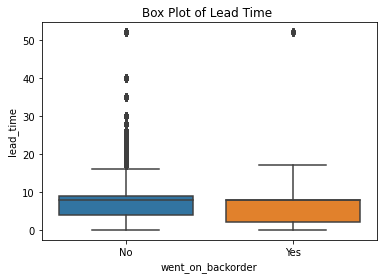

In [ ]:
sns.boxplot( x='went_on_backorder', y='lead_time', data=data).set_title("Box Plot of Lead Time ")

1. Most of the Quantile range are overlaping for both the classes, but for some data that below 25th percentile for negative class can be seperated
2. There are very few outliers

### BoxPlot for national_inv

Text(0.5, 1.0, 'Box Plot of National Inventory')

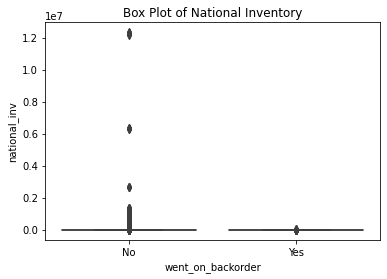

In [ ]:
sns.boxplot( x='went_on_backorder', y='national_inv', data=data).set_title("Box Plot of National Inventory")

Text(0.5, 1.0, 'Box plot of national_inv')

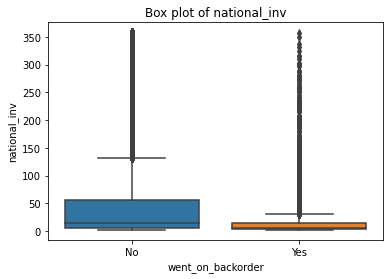

In [ ]:
sns.boxplot(x='went_on_backorder',y='national_inv', data=data[(data.national_inv < data.national_inv.quantile(0.9)) & (data.national_inv > data.national_inv.quantile(0.1))]).set_title('Box plot of national_inv')

In [ ]:
data.national_inv.quantile(0.000000001)

-27252.890963722

1. There is a lot of spread in the data.
2. Mostly both the classes overlap. 

### BoxPlot for in_transit_qty

Text(0.5, 1.0, 'Box plot of in_transit_qty')

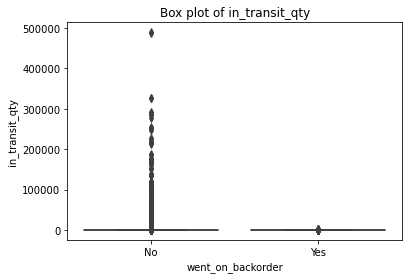

In [ ]:
sns.boxplot(x='went_on_backorder',y='in_transit_qty', data=data).set_title('Box plot of in_transit_qty')

Text(0.5, 1.0, 'Box plot of in_transit_qty')

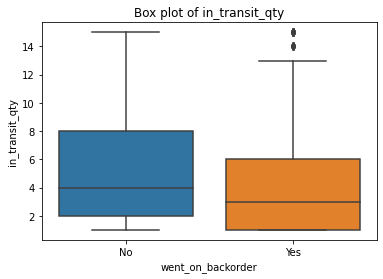

In [ ]:
sns.boxplot(x='went_on_backorder',y='in_transit_qty', data=data[(data.in_transit_qty < data.in_transit_qty.quantile(0.9)) & (data.in_transit_qty > data.in_transit_qty.quantile(0))]).set_title('Box plot of in_transit_qty')

1. Column in_transit_qty may have many outliers in the negative class
2. Most of the Quantile range are overlaping for both the classes, but for some data that below 25th(below 2) percentile for negative class can be seperated
3. There are very few outliers in positive class

### BoxPlot for forecast_3_month

Text(0.5, 1.0, 'Box plot of forecast_3_month')

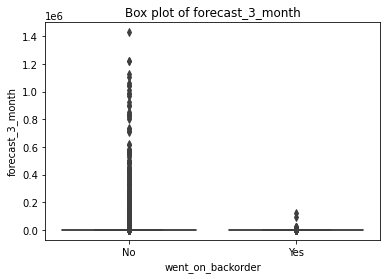

In [ ]:
sns.boxplot(x='went_on_backorder',y='forecast_3_month', data=data).set_title('Box plot of forecast_3_month')

Text(0.5, 1.0, 'Box plot of forecast_3_month')

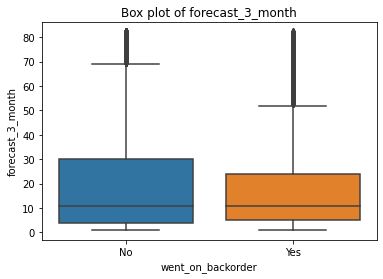

In [ ]:
sns.boxplot(x='went_on_backorder',y='forecast_3_month', data=data[(data.forecast_3_month < data.forecast_3_month.quantile(0.9)) & (data.forecast_3_month > data.forecast_3_month.quantile(0))]).set_title('Box plot of forecast_3_month')

- For the forecast of 3 months it shows that there is a lot of spread and positive class for wnt to backorder totally overlaps with negative class

### BoxPlot for forecast_6_month

Text(0.5, 1.0, 'Box plot of forecast_6_month')

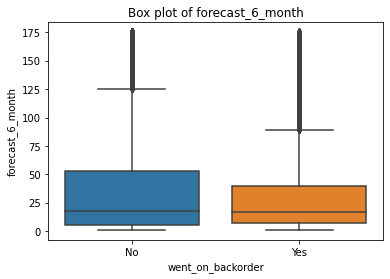

In [ ]:
sns.boxplot(x='went_on_backorder',y='forecast_6_month', data=data[(data.forecast_6_month < data.forecast_6_month.quantile(0.9)) & (data.forecast_6_month > data.forecast_6_month.quantile(0))]).set_title('Box plot of forecast_6_month')

- For the forecast of 6 months (same as forecast_3_month) it shows that there is a lot of spread and positive class for wnt to backorder totally overlaps with negative class

### BoxPlot for forecast_9_month

Text(0.5, 1.0, 'Box plot of forecast_9_month')

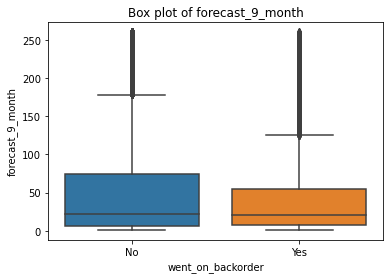

In [ ]:
sns.boxplot(x='went_on_backorder',y='forecast_9_month', data=data[(data.forecast_9_month < data.forecast_9_month.quantile(0.9)) & (data.forecast_9_month > data.forecast_9_month.quantile(0))]).set_title('Box plot of forecast_9_month')

- For the forecast of 9 months (same as forecast_3_month) it shows that there is a lot of spread and positive class for wnt to backorder totally overlaps with negative class

### BoxPlot for sales_1_month

Text(0.5, 1.0, 'Box plot of sales_1_month')

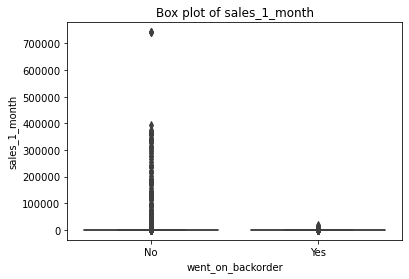

In [ ]:
sns.boxplot(x='went_on_backorder',y='sales_1_month', data=data).set_title('Box plot of sales_1_month')

Text(0.5, 1.0, 'Box plot of sales_1_month')

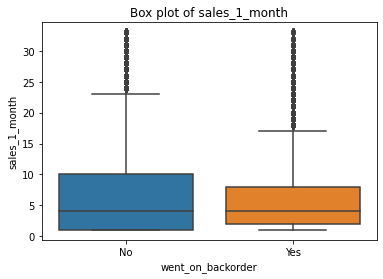

In [ ]:
sns.boxplot(x='went_on_backorder',y='sales_1_month', data=data[(data.sales_1_month < data.sales_1_month.quantile(0.9)) & (data.sales_1_month > data.sales_1_month.quantile(0))]).set_title('Box plot of sales_1_month')

### BoxPlot for sales_3_month

Text(0.5, 1.0, 'Box plot of sales_3_month')

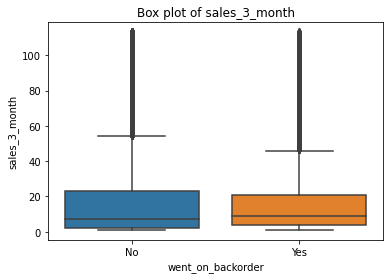

In [ ]:
sns.boxplot(x='went_on_backorder',y='sales_3_month', data=data[(data.sales_3_month < data.sales_3_month.quantile(0.9)) & (data.sales_3_month > data.sales_3_month.quantile(0))]).set_title('Box plot of sales_3_month')

### BoxPlot for sales_6_month

Text(0.5, 1.0, 'Box plot of sales_6_month')

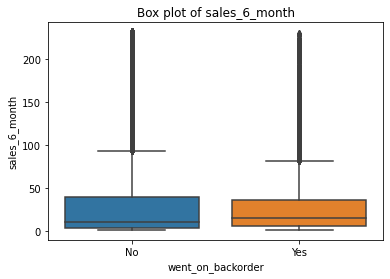

In [ ]:
sns.boxplot(x='went_on_backorder',y='sales_6_month', data=data[(data.sales_6_month < data.sales_6_month.quantile(0.9)) & (data.sales_6_month > data.sales_6_month.quantile(0))]).set_title('Box plot of sales_6_month')

### BoxPlot for sales_9_month

Text(0.5, 1.0, 'Box plot of sales_9_month')

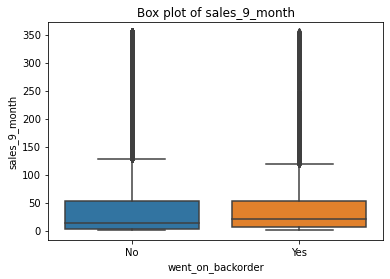

In [ ]:
sns.boxplot(x='went_on_backorder',y='sales_9_month', data=data[(data.sales_9_month < data.sales_9_month.quantile(0.9)) & (data.sales_9_month > data.sales_9_month.quantile(0))]).set_title('Box plot of sales_9_month')

- There is a lot of spread as the forecast feature and when we look at all the sales features, they have same distributions like all overlap class

### BoxPlot for min_bank

Text(0.5, 1.0, 'Box plot of min_bank')

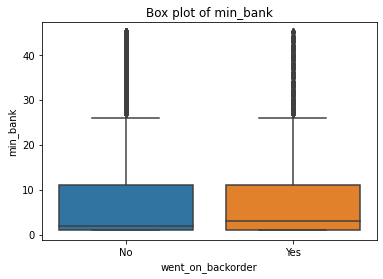

In [ ]:
sns.boxplot(x='went_on_backorder',y='min_bank', data=data[(data.min_bank < data.min_bank.quantile(0.9)) & (data.min_bank > data.min_bank.quantile(0))]).set_title('Box plot of min_bank')

- min_back is a minimum stock recomemded and there is lot of spread as some products my need in larger quantity
- Mostly both the classes overlap.
- Most of the items min_back is under 25 for both the classes

### BoxPlot for pieces_past_due

In [ ]:
data.pieces_past_due.value_counts().sort_index(ascending=True)

0.0         1662571
1.0            3917
2.0            2187
3.0            1217
4.0            1294
             ...   
83600.0           1
87689.0           1
98776.0           1
137625.0          1
146496.0          1
Name: pieces_past_due, Length: 826, dtype: int64

Text(0.5, 1.0, 'Box plot of pieces_past_due')

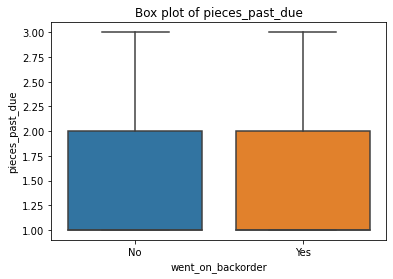

In [ ]:
sns.boxplot(x='went_on_backorder',y='pieces_past_due', data=data[(data.pieces_past_due < data.pieces_past_due.quantile(0.99)) & (data.pieces_past_due > data.pieces_past_due.quantile(0))]).set_title('Box plot of pieces_past_due')

- Only 1% of data are non-zero
- Both the clasess overlap

### BoxPlot for perf_6_month_avg

Text(0.5, 1.0, 'Box plot of perf_6_month_avg')

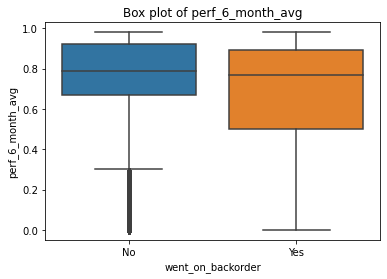

In [ ]:
sns.boxplot(x='went_on_backorder',y='perf_6_month_avg', data=data[(data.perf_6_month_avg < data.perf_6_month_avg.quantile(0.9)) & (data.perf_6_month_avg > data.perf_6_month_avg.quantile(0))]).set_title('Box plot of perf_6_month_avg')

### BoxPlot for perf_12_month_avg

Text(0.5, 1.0, 'Box plot of perf_12_month_avg')

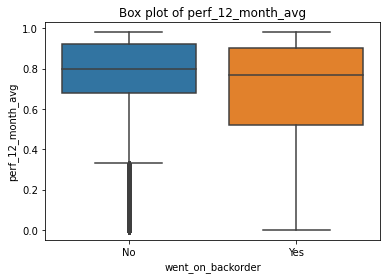

In [ ]:
sns.boxplot(x='went_on_backorder',y='perf_12_month_avg', data=data[(data.perf_12_month_avg < data.perf_12_month_avg.quantile(0.9)) & (data.perf_12_month_avg > data.perf_12_month_avg.quantile(0))]).set_title('Box plot of perf_12_month_avg')

- In both perf_6_month_avg and perf_12_month_avg has -99 value in it for some data points, most of the others has 0 to 1. we can consider this -99 values as a missing nan value.
- In both the features we can also observ that those items which underperformed than 25th percentile of the negative class ended up in the went to backorder

### BoxPlot for local_bo_qty

Text(0.5, 1.0, 'Box plot of local_bo_qty')

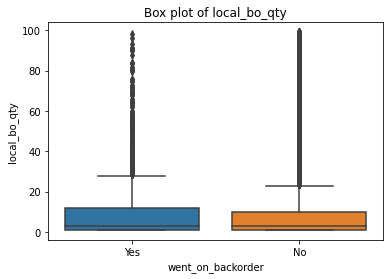

In [ ]:
sns.boxplot(x='went_on_backorder',y='local_bo_qty', data=data[(data.local_bo_qty < data.local_bo_qty.quantile(0.999)) & (data.local_bo_qty > data.local_bo_qty.quantile(0))]).set_title('Box plot of local_bo_qty')

- local_bo_qty(stock overdue) has a very less data, it has only 1% of data and others are zeros

## For Categorical Features

### BarPlot for potential_issue

In [ ]:

# Create a dataframe with the counts by passenger class and survival
# ["Name"] could be any column within the data; it is the equivalent
# of COUNT(id) in SQL

# https://medium.com/analytics-vidhya/tutorial-exploratory-data-analysis-eda-with-categorical-variables-6a569a3aea55


went_on_backorder        No       Yes
potential_issue                      
No                 0.993336  0.006664
Yes                0.943771  0.056229


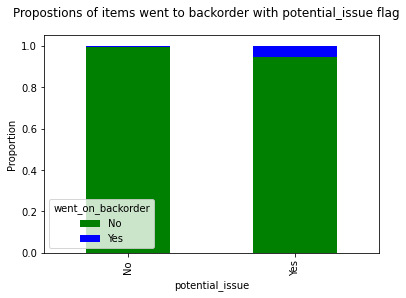

In [ ]:
# https://medium.com/analytics-vidhya/tutorial-exploratory-data-analysis-eda-with-categorical-variables-6a569a3aea55


counts_df = data.groupby(["potential_issue", "went_on_backorder"])["sku"].count().unstack()

potential_issue_pro_df = counts_df.T.div(counts_df.T.sum()).T
print(potential_issue_pro_df)

fig, ax = plt.subplots()

potential_issue_pro_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("potential_issue")
ax.set_ylabel("Proportion")

fig.suptitle("Propostions of items went to backorder with potential_issue flag");

- We can observe that if the flag potential_issue is positive then there is a little chance positive in went_to_backorder than the negative in potential_issue

### BarPlot for deck_risk

went_on_backorder        No       Yes
deck_risk                            
No                 0.992789  0.007211
Yes                0.995055  0.004945


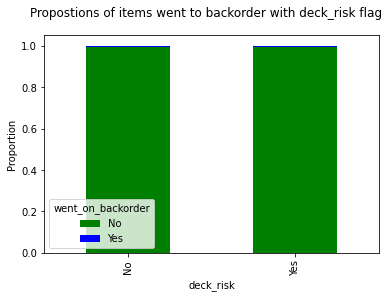

In [ ]:
# Transpose so survived + did not survive add up to 1, divide by the total number (transposed), then transpose one more time for plotting
counts_df = data.groupby(["deck_risk", "went_on_backorder"])["sku"].count().unstack()

deck_risk_pro_df = counts_df.T.div(counts_df.T.sum()).T
print(deck_risk_pro_df)

fig, ax = plt.subplots()

deck_risk_pro_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("deck_risk")
ax.set_ylabel("Proportion")

fig.suptitle("Propostions of items went to backorder with deck_risk flag");

- In this flag deck_risk both the classes are same for the negative and positive, we cant derive much from it.

### BarPlot for oe_constraint

went_on_backorder        No       Yes
oe_constraint                        
No                 0.993313  0.006687
Yes                0.967347  0.032653


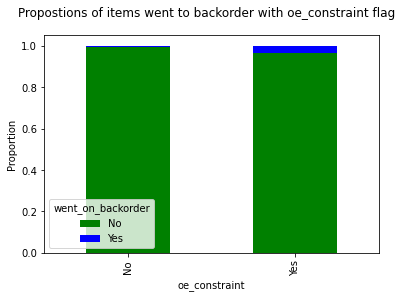

In [ ]:
# Transpose so survived + did not survive add up to 1, divide by the total number (transposed), then transpose one more time for plotting
counts_df = data.groupby(["oe_constraint", "went_on_backorder"])["sku"].count().unstack()

oe_constraint_pro_df = counts_df.T.div(counts_df.T.sum()).T
print(oe_constraint_pro_df)

fig, ax = plt.subplots()

oe_constraint_pro_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("oe_constraint")
ax.set_ylabel("Proportion")

fig.suptitle("Propostions of items went to backorder with oe_constraint flag");

- We can observe that if the flag oe_constriant is positive then there is a little chance of being positive in went_to_backorder than the negative in oe_constriant

### BarPlot for ppap_risk

went_on_backorder        No       Yes
ppap_risk                            
No                 0.993576  0.006424
Yes                0.991370  0.008630


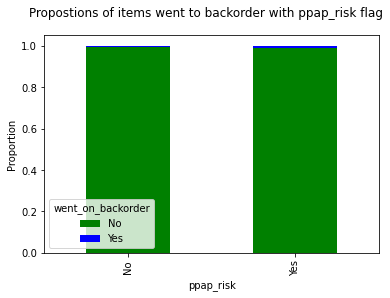

In [ ]:
# Transpose so survived + did not survive add up to 1, divide by the total number (transposed), then transpose one more time for plotting
counts_df = data.groupby(["ppap_risk", "went_on_backorder"])["sku"].count().unstack()

ppap_risk_pro_df = counts_df.T.div(counts_df.T.sum()).T
print(ppap_risk_pro_df)
fig, ax = plt.subplots()

ppap_risk_pro_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("ppap_risk")
ax.set_ylabel("Proportion")

fig.suptitle("Propostions of items went to backorder with ppap_risk flag");

- In this flag ppap_risk both the classes are same for the negative and positive, we cant derive much from it.

### BarPlot for stop_auto_buy

went_on_backorder        No       Yes
stop_auto_buy                        
No                 0.992290  0.007710
Yes                0.993348  0.006652


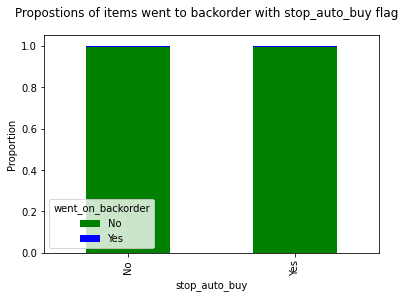

In [ ]:
# Transpose so survived + did not survive add up to 1, divide by the total number (transposed), then transpose one more time for plotting
counts_df = data.groupby(["stop_auto_buy", "went_on_backorder"])["sku"].count().unstack()

stop_auto_buy_pro_df = counts_df.T.div(counts_df.T.sum()).T
print(stop_auto_buy_pro_df)

fig, ax = plt.subplots()

stop_auto_buy_pro_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("stop_auto_buy")
ax.set_ylabel("Proportion")

fig.suptitle("Propostions of items went to backorder with stop_auto_buy flag");

- In this flag stop_auto_buy both the classes are same for the negative and positive, we cant derive much from it.

### BarPlot for rev_stop

went_on_backorder        No       Yes
rev_stop                             
No                 0.993306  0.006694
Yes                1.000000       NaN


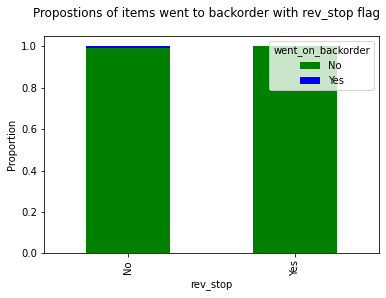

In [ ]:
# Transpose so survived + did not survive add up to 1, divide by the total number (transposed), then transpose one more time for plotting
counts_df = data.groupby(["rev_stop", "went_on_backorder"])["sku"].count().unstack()

rev_stop_pro_df = counts_df.T.div(counts_df.T.sum()).T
print(rev_stop_pro_df)

fig, ax = plt.subplots()

rev_stop_pro_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("rev_stop")
ax.set_ylabel("Proportion")

fig.suptitle("Propostions of items went to backorder with rev_stop flag");

- It is clear that if the flag rev_stop is positive then it is negative for went_on_backorder.

## Correlation matrix

In [ ]:
data

NameError: name 'data' is not defined

<AxesSubplot:>

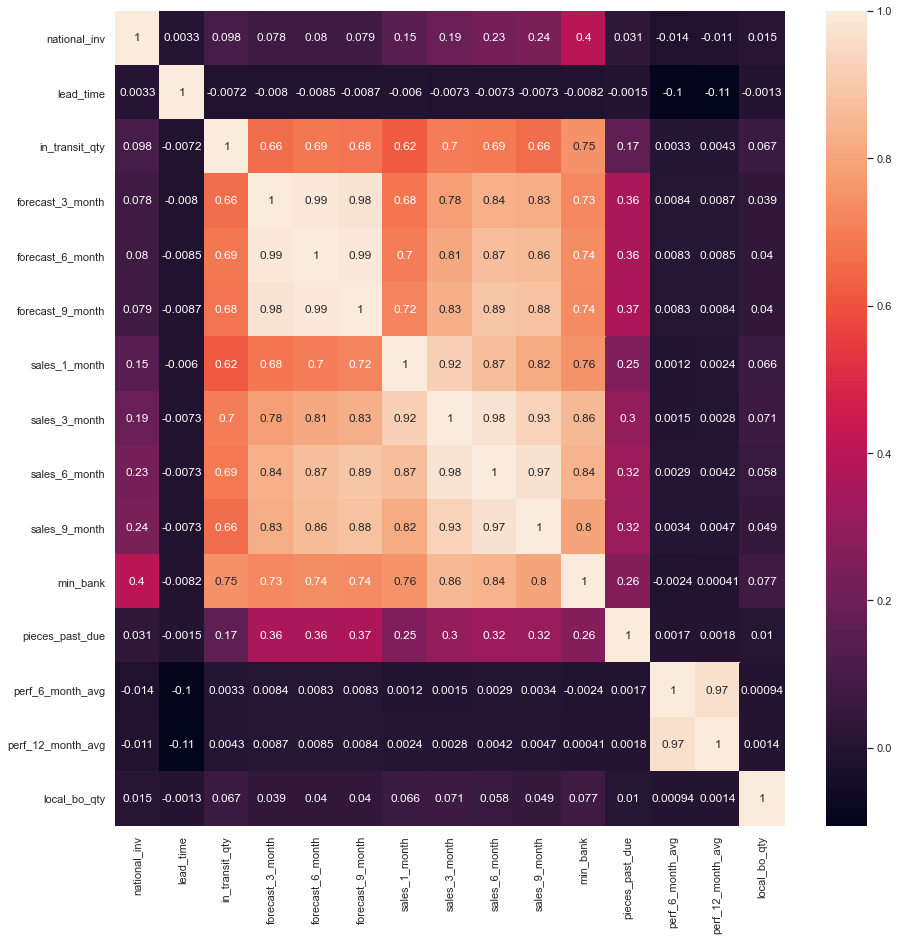

In [ ]:
cor = data.corr()
cor
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(cor, 
        annot = True)

- Forecast_3_month, forecast_6_month and forecasr_9_month features are higly correlated (0.98 to 0.99) as those are same data collected for a diffirent period of time
- sales_1_month, sales_3_month, sales_6_month and sales_9_month features are also highly correlated (0.82 to 0.92) as those are same data collected for a diffrent period of times
- min_bank feature is highly correlated to both sales and forecaste features as minimum amount of stock recommnded is related to sales
- perf_6_month_avg and perf_12_month_avg are very highly correlated (0.97) to each other as they are of same data collected fpr different period of time
- in_transit_qty feature is highly correlated to sales, forecast and min_bank, as we know that more sales and forecast leads to more inventory and more ordring of those products which may be in in transit

## Pait Plot

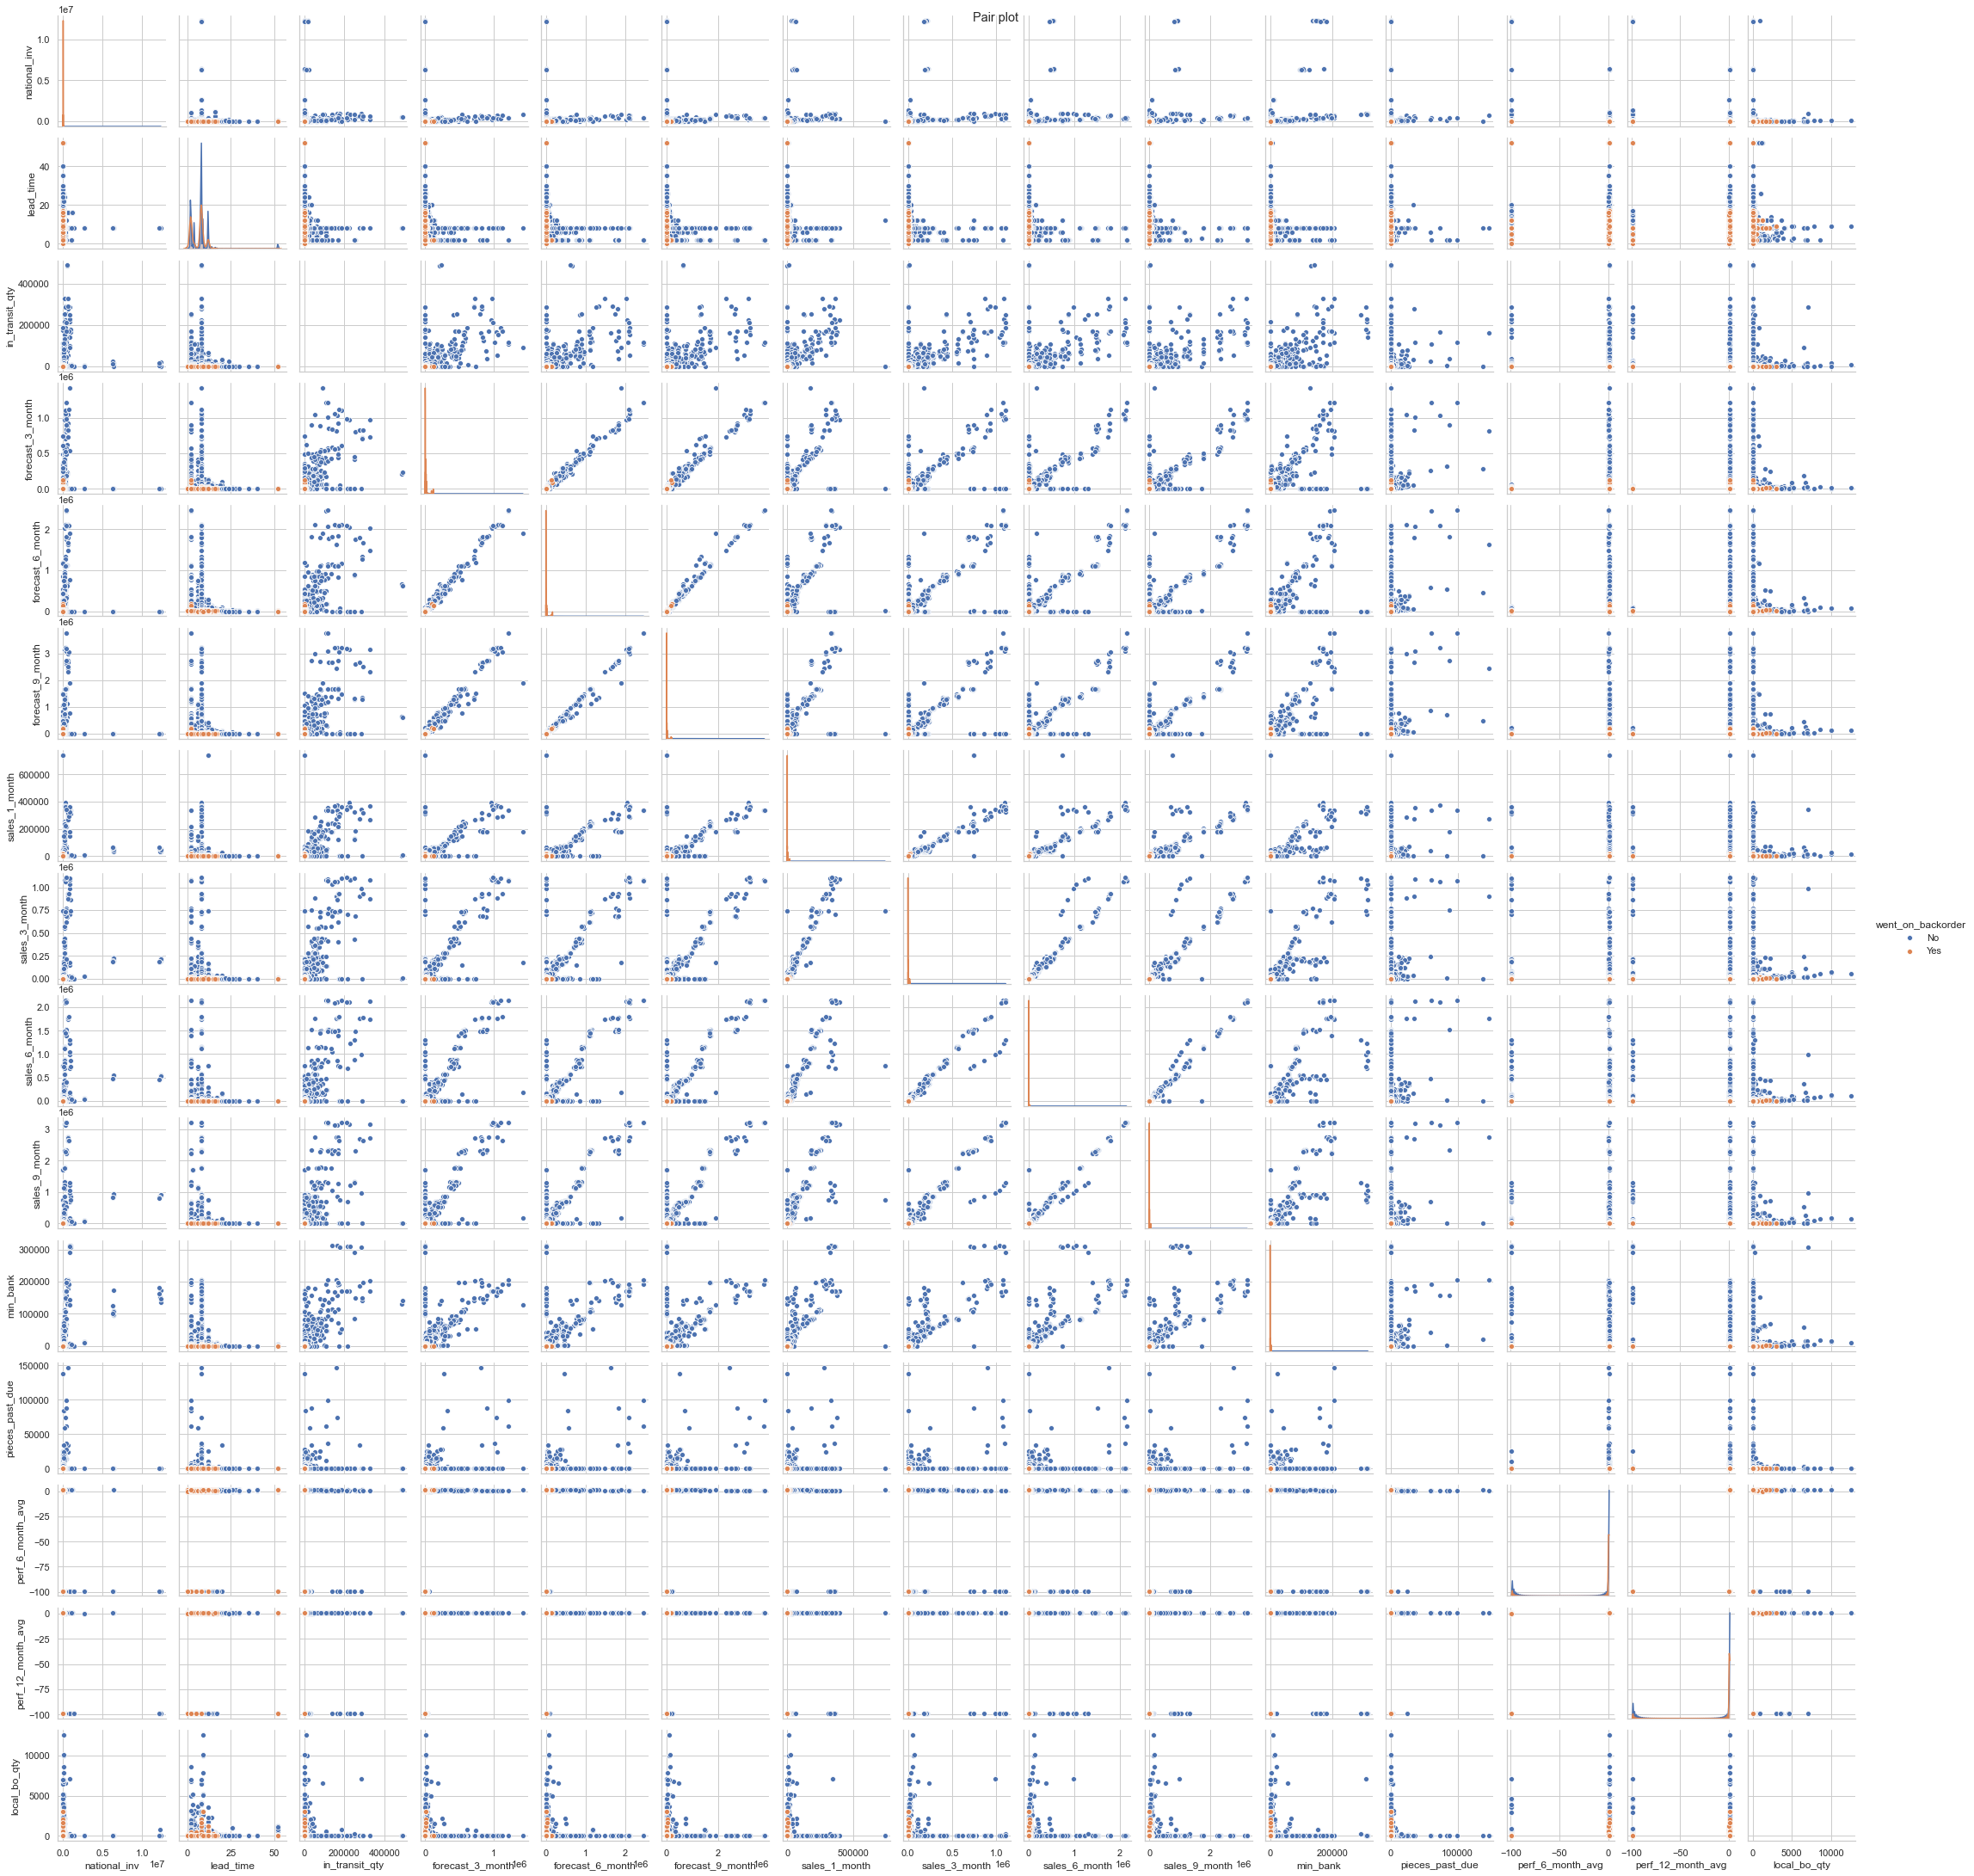

In [ ]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, hue="went_on_backorder", size=2).fig.suptitle("Pair plot",y=1);


- As the data is highly imbalanced pair plot is not clear
- As we also seen in boxplots that there is a lot of noise in all the features and some features have only 1% of non-zero data, so we cant get any significant conclutions form the pair plots.

## Data Preprocessing 

### Replacing -99 values in perf_  and perf column as nan

In [ ]:
data.perf_12_month_avg.replace({-99.0 : np.nan}, inplace = True)
data.perf_6_month_avg.replace({-99.0 : np.nan}, inplace = True)

In [ ]:
data.drop(data.tail(1).index,inplace=True) 
data.drop(['sku'], axis = 1,inplace=True)

### converting categorical features as labels(YES to 1 and NO to 0)

In [ ]:
cat_features = data.select_dtypes(include = ['object']).columns
for col in cat_features:
    data[col].replace({'No': 0, 'Yes': 1}, inplace=True)
    data[col] = data[col].astype(int)

## Feature Eng

### Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

X= data.drop(['went_on_backorder'], axis=1)
y = data.went_on_backorder
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 33 ,test_size=0.20, stratify=y)
# X_train, X_cv, y_train, y_cvtrain_test_split(X_train, y_train , random_state = 33 , stratify=y,test_size=0.1)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,random_state = 33,test_size=0.10,stratify=y_train)


In [ ]:
X_train

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
1437004,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.99,0.96,0.0,0,0,0,1,0
582719,7325.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,11.0,92.0,...,0,0.0,NaN,NaN,0.0,0,0,0,1,0
250698,190.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,NaN,0.33,0.0,0,0,1,0,0
1599337,15.0,8.0,18.0,0.0,15.0,35.0,6.0,15.0,39.0,59.0,...,0,0.0,0.76,0.84,0.0,0,0,0,1,0
451811,10.0,12.0,0.0,2.0,10.0,14.0,4.0,5.0,8.0,16.0,...,0,0.0,0.93,0.95,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190510,230.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.98,0.97,0.0,0,0,0,1,0
486572,15.0,8.0,0.0,0.0,0.0,0.0,3.0,5.0,14.0,20.0,...,0,0.0,0.99,0.97,0.0,0,0,1,1,0
622924,190.0,2.0,0.0,0.0,0.0,0.0,10.0,34.0,47.0,84.0,...,0,0.0,NaN,NaN,0.0,0,0,0,1,0
330428,34.0,NaN,0.0,0.0,0.0,0.0,2.0,13.0,33.0,49.0,...,0,0.0,NaN,NaN,0.0,0,0,0,0,0


### Missing values imputation

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:

df = X_train
imp = IterativeImputer(max_iter=10, verbose=0)
imp.fit(X_train)
imputed_X_train = imp.transform(X_train)
imputed_X_test = imp.transform(X_test)

X_train = pd.DataFrame(imputed_X_train, columns=df.columns)
X_test = pd.DataFrame(imputed_X_test, columns=df.columns)



In [ ]:
imputer = IterativeImputer(max_iter=10, random_state=0)
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)


In [ ]:
X_train

array([[8.00000000e+00, 8.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [7.32500000e+03, 7.17764330e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.90000000e+02, 1.20000000e+01, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.90000000e+02, 2.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.40000000e+01, 2.03621221e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.90000000e+01, 2.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

### Standardizing the data

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


## Conclusion

1. Data is higly imbalanced
2. We have a total 23 columns in which 22 are independent and one is the target variable “went_on_backorder”. sku is a unique number so we can drop the column.
3. After removing the unique sku column, we have 15 are numerical and 6 are categorical and 1 is target variable (binary YES or NO).
4. We have 1687861 data points in training dataset
5. Last row consists of many NaN values, so droped it
6. Almost all the numerical features are highly swkeed
7. perf_6_month_avg and perf_12_month_avg has a value -99 whcih indicaes the missing values. so replaced -99 as nan value and imputed using model based imputer "IterativeImputer".
8. Converted categorical features(all Binary(Yes or No)) in to numerical by replacing Yes with 1 and No with 0
9. Also standardized data using StandardScaler